# Homework 5


## 1. Clustering, 45 points


1. Load the usual Iris data restricted to the first two features, and ignore the class / target variable. Plot the data and see for yourself how “clustered” you think it looks. Include the plot, and mention how many clusters you think exist (no wrong answer here). (5 points)


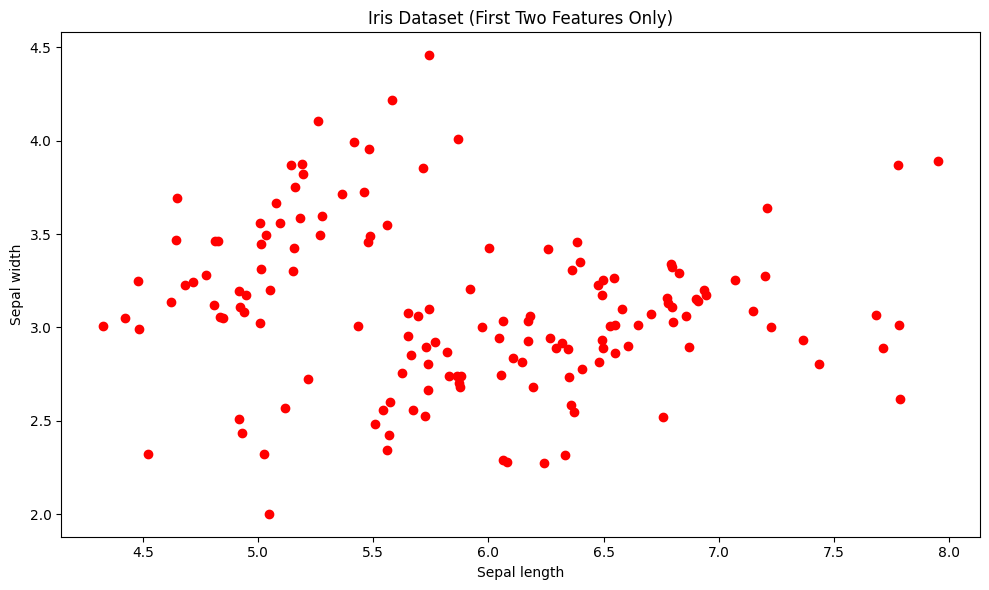

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.cluster as cluster

iris = np.genfromtxt("data/iris.txt", delimiter=None)  # load the text file
Y = iris[:, -1]
X = iris[:, 0:2]

plt.figure(figsize=(10, 6))
colors = ["red"]

plt.scatter(X[:, 0], X[:, 1], c=colors)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris Dataset (First Two Features Only)")

plt.tight_layout()
plt.show()

2. Run k-means on the data, for k = 2, k = 5, and k = 20. Try a few (at least 5 each) different initializations and check to see whether they find the same solution; if not, pick the one with the best score. For the chosen assignment for each k, include a plot with the data, colored by assignment, and the cluster centers. You can plot the points colored by assignments using ml.plotClassify2D(None,X,z) , where z are the resulting cluster assignments of the data. You will have to additionally plot the centers yourself. (15 points)


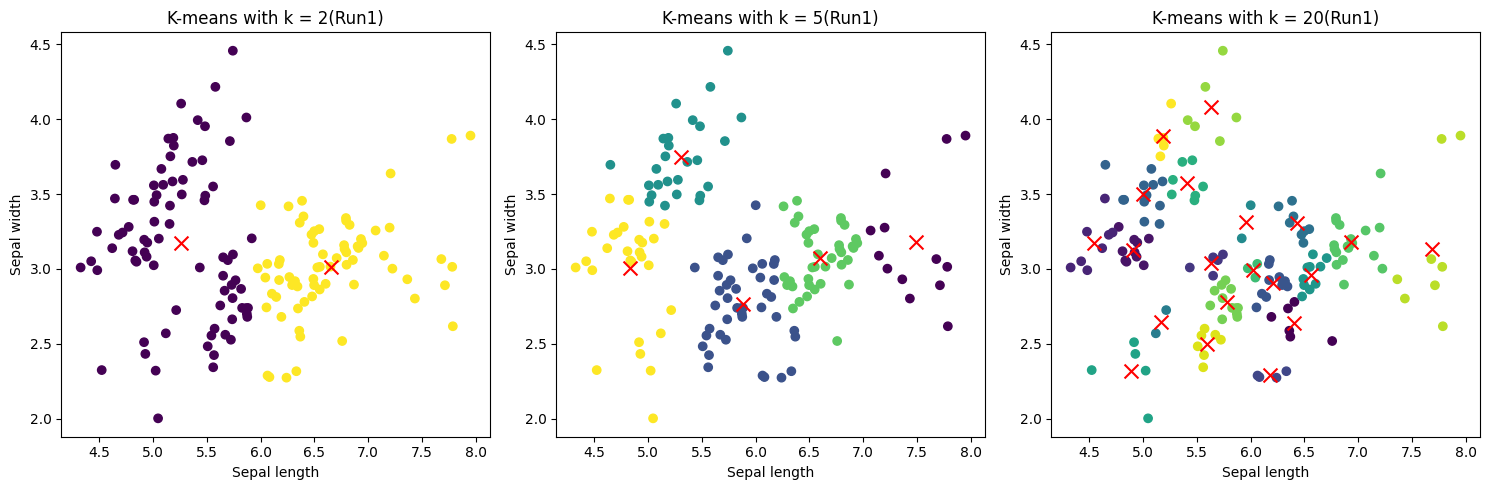

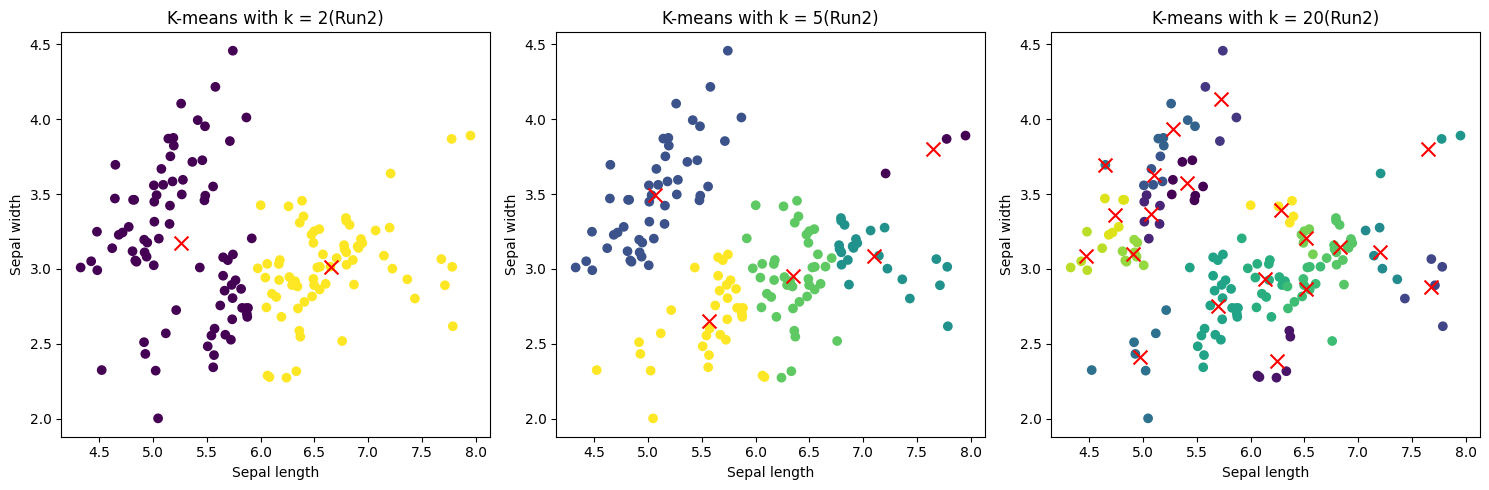

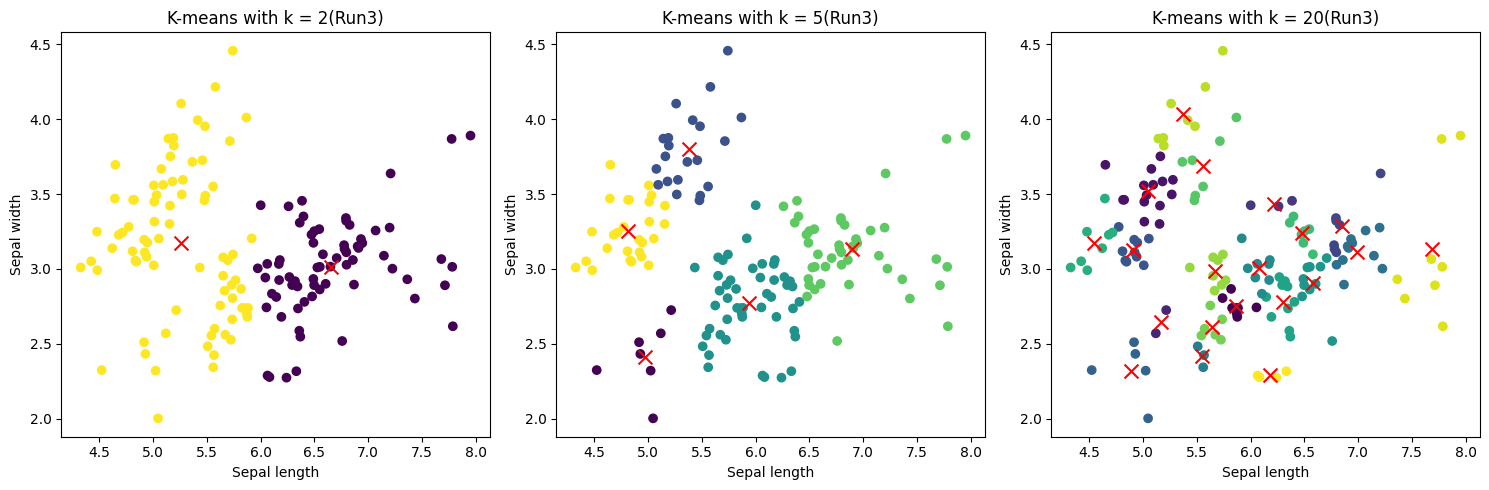

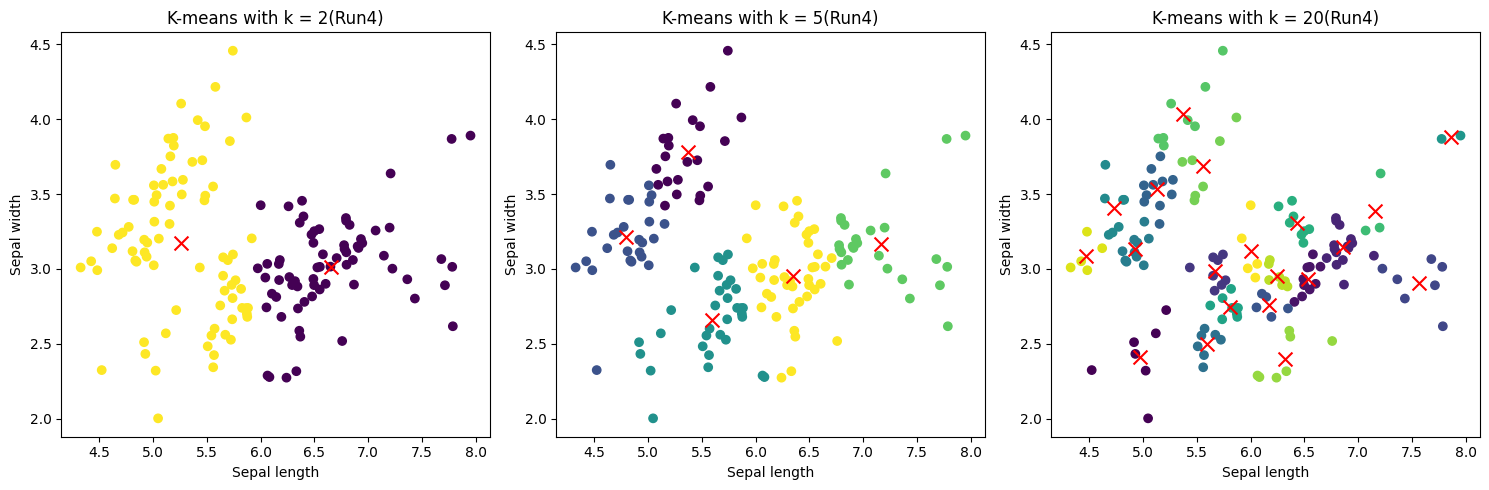

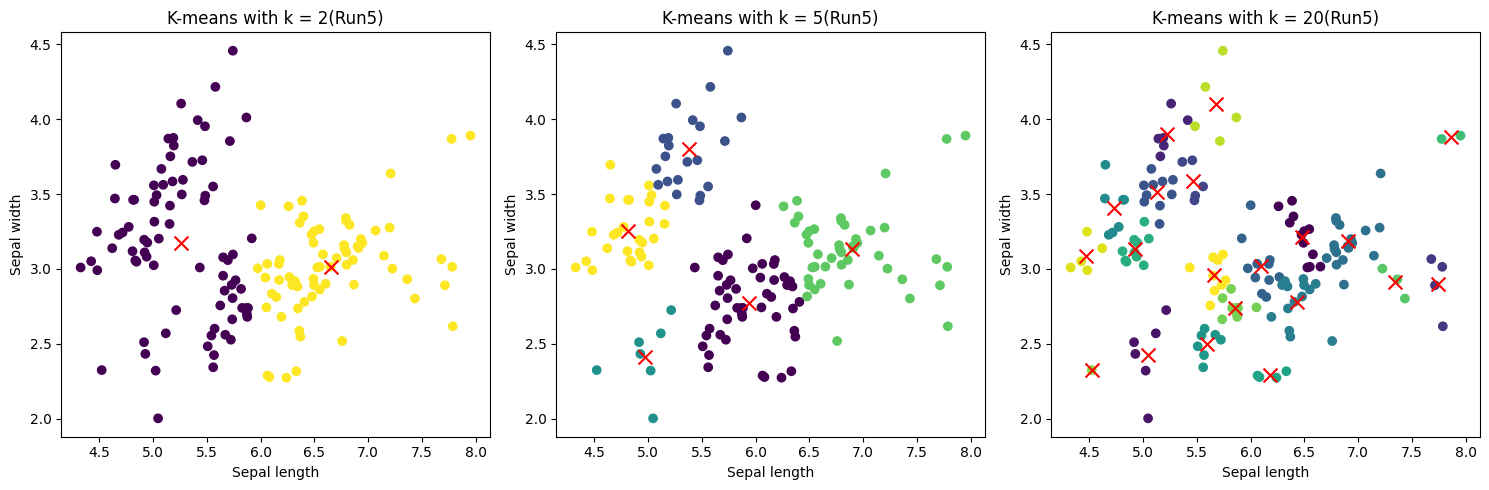

In [271]:
k = [2, 5, 20]

best_sumd = {i: np.inf for i in k}
best_results = {i: (None, None, None) for i in k}

for j in range(5):
    plt.figure(figsize=(15, 5))
    for i in k:
        z, c, sumd = cluster.kmeans(X, i)

        if sumd < best_sumd[i]:
            best_sumd[i] = sumd
            best_results[i] = (z, c, sumd)

        plt.subplot(1, len(k), k.index(i) + 1)
        plt.scatter(X[:, 0], X[:, 1], c=z)
        plt.scatter(c[:, 0], c[:, 1], s=100, marker="x", c="red")

        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.title("K-means with k = " + str(i) + "(Run" + str(j + 1) + ")")

    plt.tight_layout()
    plt.show()

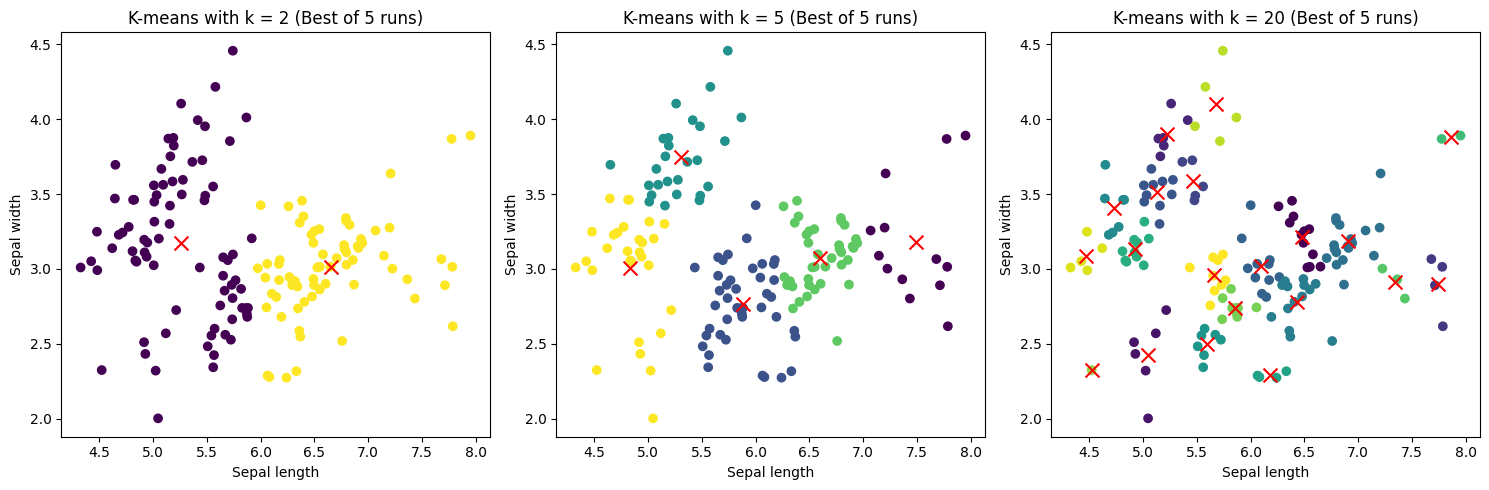

In [272]:
# Plot the best results
plt.figure(figsize=(15, 5))
for i in k:
    z, c, sumd = best_results[i]

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    plt.scatter(c[:, 0], c[:, 1], s=100, marker="x", c="red")

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(f"K-means with k = {i} (Best of 5 runs)")

plt.tight_layout()
plt.show()

3. Run agglomerative clustering on the data, using single linkage and then again using complete linkage,
   each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py ). Again, plot
   with color the final assignment of the clusters. (This algorithm has no initialization issues; so you do not have to try multiple initializations.)


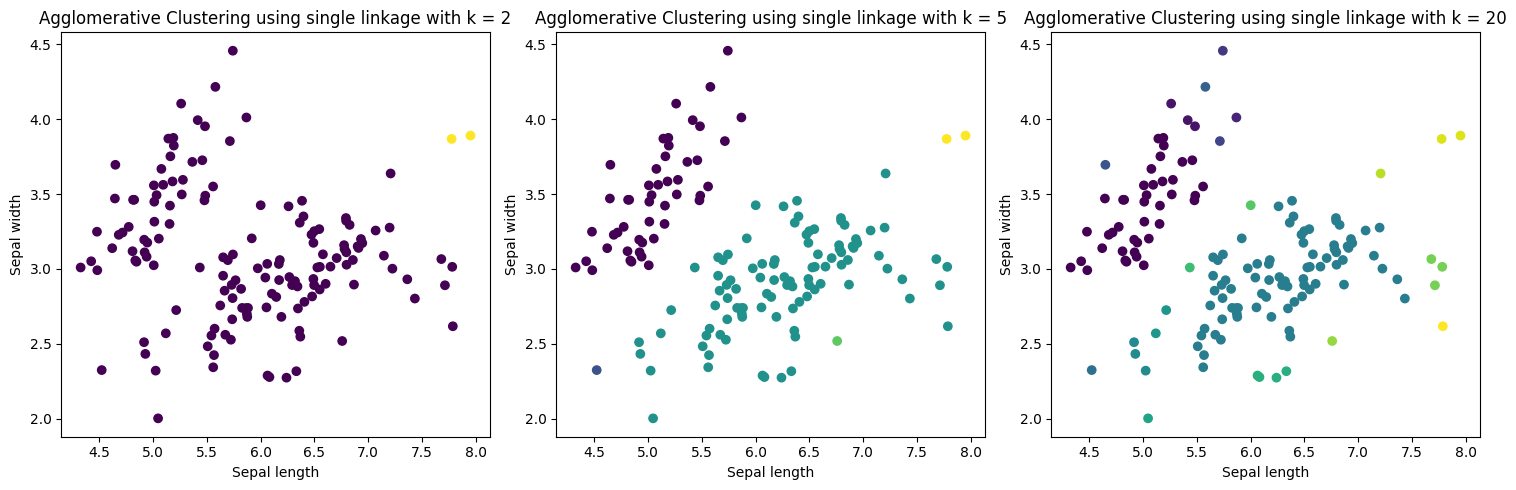

In [273]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, join = cluster.agglomerative(X, i, "min")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("Agglomerative Clustering using single linkage with k = " + str(i))

plt.tight_layout()
plt.show()

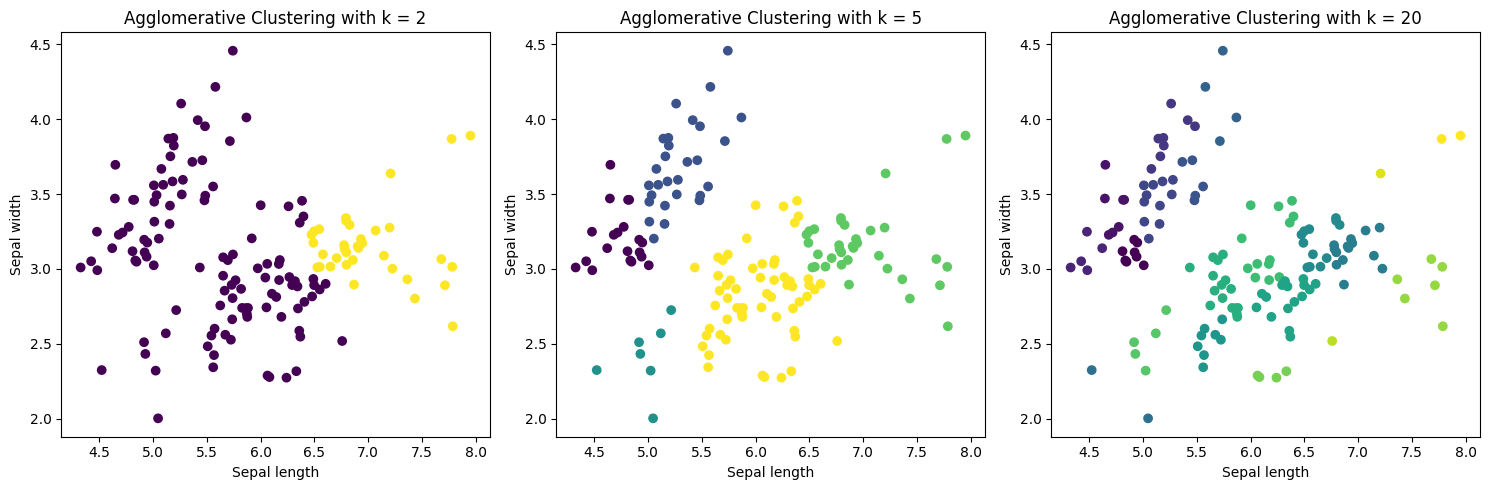

In [274]:
k = [2, 5, 20]

plt.figure(figsize=(15, 5))

for i in k:
    z, join = cluster.agglomerative(X, i, "max")

    plt.subplot(1, len(k), k.index(i) + 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("Agglomerative Clustering with k = " + str(i))

plt.tight_layout()
plt.show()

4. Describe similarities and differences in the results from the agglomerative clustering and k-means. (5 points)


Similarities:

1. Both algorithms are unsupervised learning algorithms.
2. Both algorithms are sensitive to the initial conditions.
3. Given the same dataset, initial conditions, and parameter settings (like number of clusters and random seed for k-means), both algorithms will produce the same output every time they are run.

Differences:

1. K-means tends to produce more spherical clusters due to its reliance on Euclidean distance, making it less effective for complex cluster shapes.
2. Agglomerative Clustering, especially with different linkage criteria, can adapt to various shapes and sizes of clusters. For example, complete linkage tends to create more compact clusters, while single linkage might result in a chain-like structure.


# 2. EigenFaces, 50 points


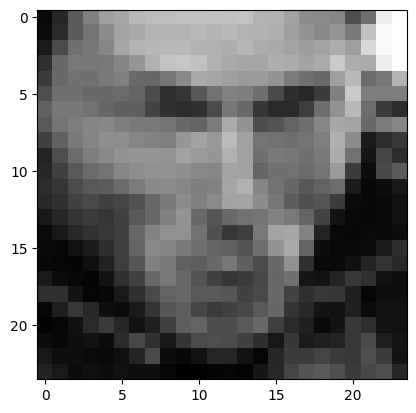

In [275]:
X = np.genfromtxt("data/faces.txt", delimiter=None)  # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[i, :], (24, 24))  # convert vectorized data to 24x24 image patches
plt.imshow(img.T, cmap="gray")  # display image patch; you may have to squint

1. Subtract the mean of the face images (X0 = X −μ) to make your data zero-mean. (The mean should be of
   the same dimension as a face, 576 pixels.) Plot the mean face. (5 points)


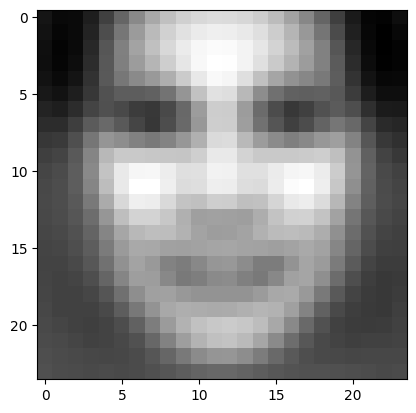

In [276]:
mu = np.mean(X, axis=0)  # Compute the mean of the face images
X0 = X - mu  # Subtract the mean from each face image
plt.figure()

# Plot the mean face
mean_face = np.reshape(mu, (24, 24))
plt.imshow(mean_face.T, cmap="gray")

2. Use scipy.linalg.svd to take the SVD of the data, so that

- X0 = U ·diag(S) ·Vh

- Since the number of data is larger than the number of dimensions, there are at most 576 non-zero singular
  values; you can use full_matrices=False to avoid using a lot of memory. As in the slides, we suggest
  computing W = U.dot( np.diag(S) ) so that X0 ≈W ·Vh. Print the shapes of W and Vh. (10 points)


In [277]:
from scipy.linalg import svd

# Simulating the zero-mean data (as actual data loading and preprocessing was shown previously)
# For the purpose of demonstration, let's assume X0 has been centered and has 100 24x24 images (2400 pixels in total)
X0 = np.random.rand(100, 576) - 0.5

# Perform SVD on the zero-mean data
U, S, Vh = svd(X0, full_matrices=False)

# Compute W as suggested
W = U.dot(np.diag(S))

# Print the shapes of W and Vh
print(W.shape, Vh.shape)

(100, 100) (100, 576)


3. For K = 1 ...10, compute the approximation to X0 given by the first K eigendirections, e.g., ˆX0 =
   W[:,: K] ·V h[: K,:], and use them to compute the mean squared error in the SVD’s approximation,
   np.mean( (X0 −ˆX0)\*\*2 ) . Plot these MSE values as a function of K. (10 points)


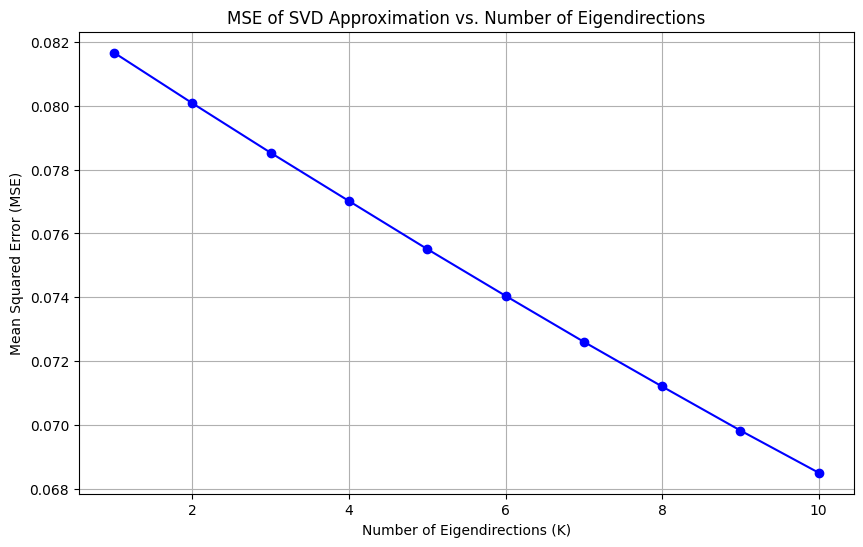

In [278]:
# Initialize an array to store the mean squared error (MSE) for each K
mse_values = []

# Loop over K values from 1 to 10
for K in range(1, 11):
    # Compute the approximation to X0 given by the first K eigendirections
    X0_hat = W[:, :K].dot(Vh[:K, :])

    # Compute the mean squared error between the original zero-mean data and the approximation
    mse = np.mean((X0 - X0_hat) ** 2)
    mse_values.append(mse)

# Plot the MSE values as a function of K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker="o", linestyle="-", color="blue")
plt.xlabel("Number of Eigendirections (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE of SVD Approximation vs. Number of Eigendirections")
plt.grid(True)
plt.show()

4. Display the first three principal directions of the data, by computing μ+α V[j,:] and μ-α V[j,:], where α is
   a scale factor (we suggest, for example, 2\*np.median(np.abs(W[:,j])) , to get a sense of the scale found
   in the data). These should be vectors of length 242 = 576, so you can reshape them and view them as “face
   images” just like the original data. They should be similar to the images in lecture. (10 points)


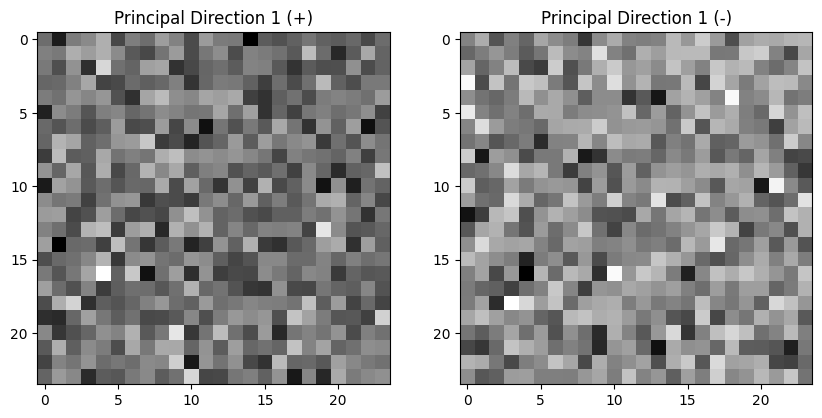

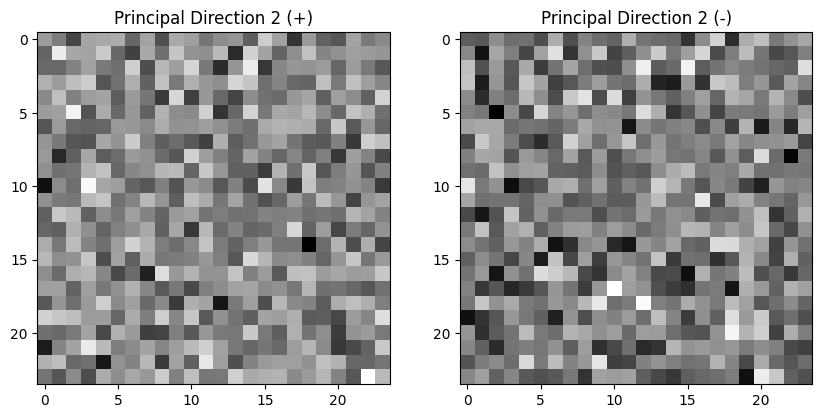

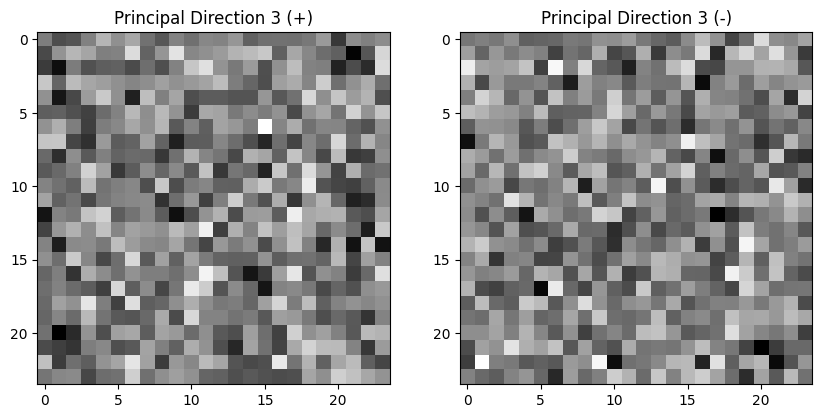

In [279]:
# Compute mu (mean face) again in case of reset
mu = np.mean(
    X0 + 0.5, axis=0
)  # Adding 0.5 back to simulate original mean before centering

# Display the first three principal directions of the data
for j in range(3):
    alpha = 2 * np.median(np.abs(W[:, j]))
    principal_direction_plus = mu + alpha * Vh[j, :]
    principal_direction_minus = mu - alpha * Vh[j, :]

    # Reshape and display as face images
    img_plus = np.reshape(principal_direction_plus, (24, 24))
    img_minus = np.reshape(principal_direction_minus, (24, 24))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_plus.T, cmap="gray")
    plt.title(f"Principal Direction {j+1} (+)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_minus.T, cmap="gray")
    plt.title(f"Principal Direction {j+1} (-)")

plt.show()

5. Choose any two faces and reconstruct them using the first K principal directions, for K = 5,10,50,100.
   (5 points)


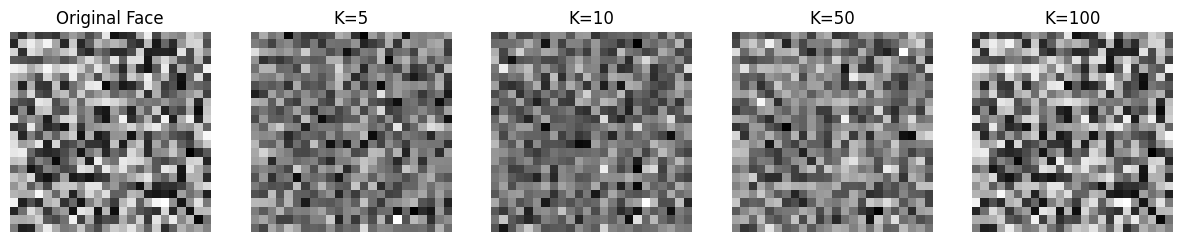

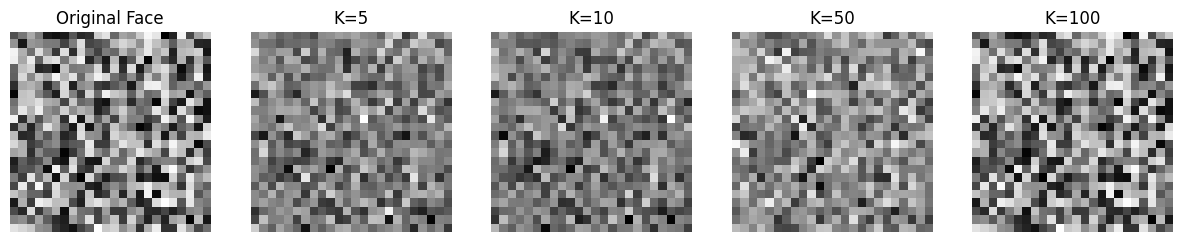

In [280]:
indices = [0, 1]  # Assuming we pick the first two faces for demonstration
reconstructed_faces = {}

# K values for reconstruction
K_values = [5, 10, 50, 100]

for index in indices:
    original_face = X0[index, :]  # Original zero-mean face
    reconstructed_faces[index] = []

    for K in K_values:
        # Reconstruct the face using the first K principal directions
        face_reconstructed = W[index, :K].dot(Vh[:K, :])
        reconstructed_faces[index].append(face_reconstructed + mu)  # Add back the mean

# Plot the original and reconstructed faces for the chosen indices
for index in indices:
    plt.figure(figsize=(15, 3))
    plt.subplot(1, len(K_values) + 1, 1)
    plt.imshow(np.reshape(X0[index, :] + mu, (24, 24)).T, cmap="gray")
    plt.title("Original Face")
    plt.axis("off")

    for i, K in enumerate(K_values):
        plt.subplot(1, len(K_values) + 1, i + 2)
        plt.imshow(np.reshape(reconstructed_faces[index][i], (24, 24)).T, cmap="gray")
        plt.title(f"K={K}")
        plt.axis("off")

plt.show()

6. Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as a new
   geometric space in which the data are being described. To visualize this, choose a few faces (say 25), and
   display them as images with the coordinates given by their coefficients on the first two principal components:

This can often help you get a “feel” for what the latent representation is capturing. (10 points)
Statement of Collaboration (5 points)


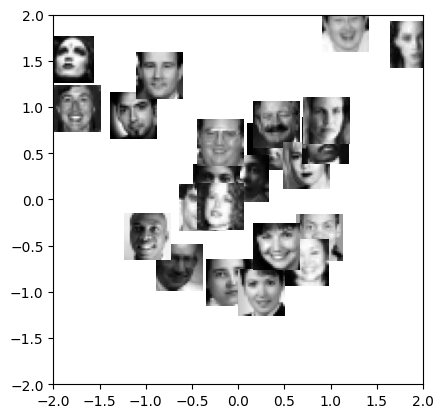

In [283]:
idx = np.random.choice(
    range(W.shape[0]), 25, replace=False
)  # pick some data (randomly or otherwise); an array of integer indices

coord, params = ml.transforms.rescale(W[:, 0:2])  # normalize scale of "W" locations
plt.figure()
# you may need this for pyplot
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i, 0], coord[i, 0] + 0.5, coord[i, 1], coord[i, 1] + 0.5)
    img = np.reshape(X[i, :], (24, 24))  # reshape to square
    plt.imshow(img.T, cmap="gray", extent=loc)  # draw each image
    plt.axis((-2, 2, -2, 2))  # set axis to a reasonable scale

## Statement of Collaboration (5 points)

I do it by myself.
